# Color Mapping

- So far we've only worked with RGB color spaces, in RGB coding, colors are modeled as a combination of Red, Green, and Blue.
- In the 1970s HSL (hue, saturation, lightness) and HSV (hue, saturation, value) were developed as alternative color models.
- HSL and HSV are more closely aligned with the way human vision actually perceives color.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

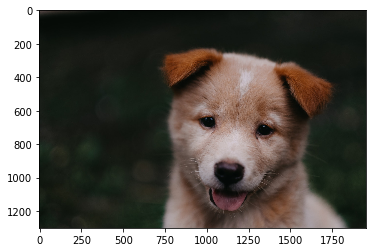

In [2]:
img = cv2.imread('data/00-puppy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

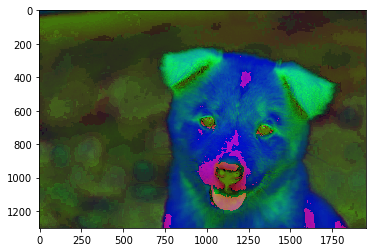

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)

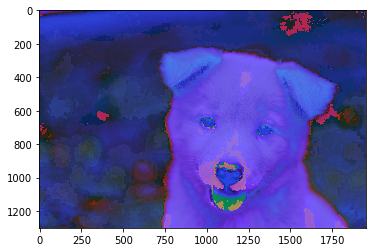

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

plt.imshow(img)

# Blending and Pasting Images

- Often we will be working with multiple images
- `OpenCV` has many programmatic methods of blending images together and pasting images on top of each other.
- Blending images is done through the `addWeighted` function that uses both images and combines them.

In [5]:
img_1 = cv2.imread('data/dog_backpack.png')
img_2 = cv2.imread('data/watermark_no_copy.png')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Image 2 shape: (1280, 1277, 3)')

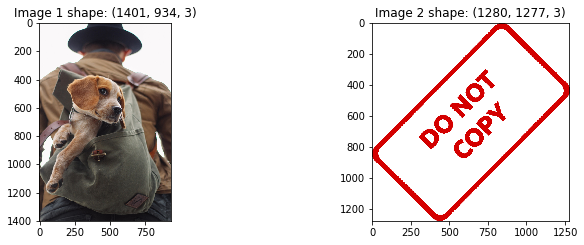

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_1)
plt.title(f"Image 1 shape: {img_1.shape}")

plt.subplot(2, 2, 2)
plt.imshow(img_2)
plt.title(f"Image 2 shape: {img_2.shape}")

Text(0.5, 1.0, 'Blended Image shape: (1200, 1200, 3)')

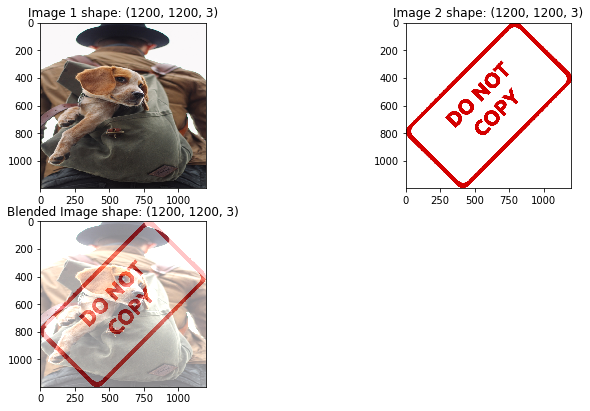

In [15]:
# Blending images of the same size

img_1_r = cv2.resize(img_1, (1200, 1200))
img_2_r = cv2.resize(img_2, (1200, 1200))

plt.figure(figsize=(12, 14))

plt.subplot(4, 2, 1)
plt.imshow(img_1_r)
plt.title(f"Image 1 shape: {img_1_r.shape}")

plt.subplot(4, 2, 2)
plt.imshow(img_2_r)
plt.title(f"Image 2 shape: {img_2_r.shape}")

blended = cv2.addWeighted(src1=img_1_r, alpha=0.8, src2=img_2_r, beta=0.5, gamma=0)
plt.subplot(4, 2, 3)
plt.imshow(blended)
plt.title(f"Blended Image shape: {blended.shape}")

### Overlay small image on top of a larger image (No blending)
### Numpy reassignment

In [16]:
# Make the small image a lot smaler
img_2 = cv2.resize(img_2, (600, 600))

In [11]:
# Define the boundaries of the image
large_img = img_1
small_img = img_2

x_offset = 0
y_offset = 0

x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

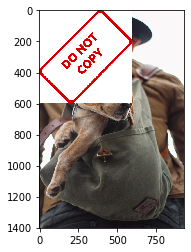

In [12]:
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

### But what if we only want to blend or replace part of the image?

In [13]:
# Blend together images of different sizes
img_1 = cv2.imread('data/dog_backpack.png')
img_2 = cv2.imread('data/watermark_no_copy.png')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

img_2 = cv2.resize(img_2, (600, 600))

In [17]:
x_offset = img_1.shape[1] - img_2.shape[1]
y_offset = img_1.shape[0] - img_2.shape[0]

roi = img_1[y_offset:img_1.shape[0], x_offset:img_1.shape[1]]

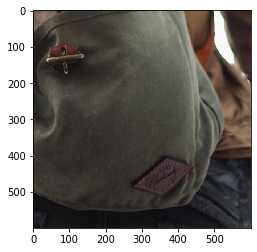

In [18]:
plt.imshow(roi)

### Create a mask

Text(0.5, 1.0, 'Image shape: (600, 600)')

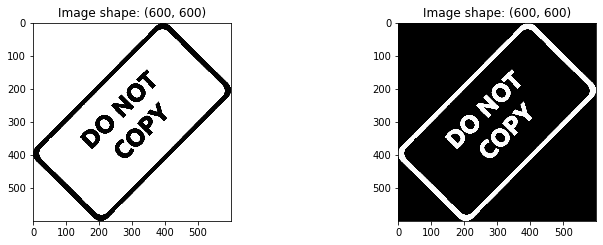

In [22]:
plt.figure(figsize=(12, 8))

img2gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
plt.subplot(2, 2, 1)
plt.imshow(img2gray, cmap='gray')
plt.title(f"Image shape: {img2gray.shape}")

mask_inverse = cv2.bitwise_not(img2gray)
plt.subplot(2, 2, 2)
plt.imshow(mask_inverse, cmap='gray')
plt.title(f"Image shape: {mask_inverse.shape}")

We notice that the shape of has changed and it no longer 3D image.

In [23]:
white_background = np.full(img_2.shape, 255, dtype=np.uint8)
white_background.shape

(600, 600, 3)

(600, 600, 3)


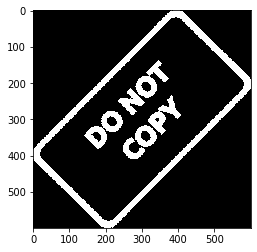

In [24]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inverse)
print(bk.shape)
plt.imshow(bk)

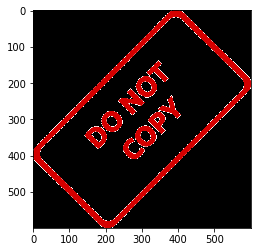

In [25]:
fg = cv2.bitwise_or(img_2, img_2, mask=mask_inverse)
plt.imshow(fg)

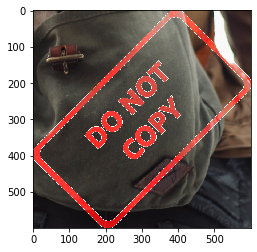

In [26]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

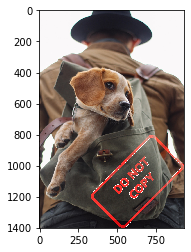

In [27]:
large_img = img_1
small_img = final_roi

large_img[y_offset:y_offset+img_1.shape[0], x_offset:x_offset+img_1.shape[1]] = small_img
plt.imshow(large_img)

# Images Thresholding

- In some CV Applications it is often necessary to convert color images to grayscale, since only edges and shapes end up being important.
- Similarly, some applications only require a binary image showing general shapes.
- Thresholding is fundamentally a very simple method of segmenting an image into different parts.
- Thresholding will convert an image to consist of only two values, white or black.

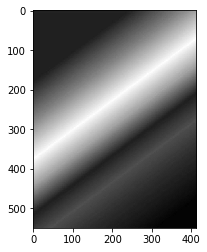

In [32]:
img = cv2.imread('data/rainbow.jpg', 0)
plt.imshow(img, cmap='gray')

In [33]:
print(img.min())
print(img.max())

87
214


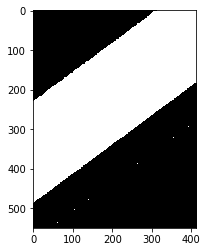

In [34]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

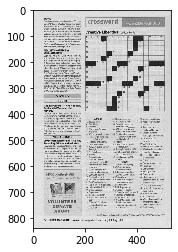

In [35]:
img = cv2.imread('data/crossword.jpg', 0)
plt.imshow(img, cmap='gray')

In [37]:
def show_pic(img):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

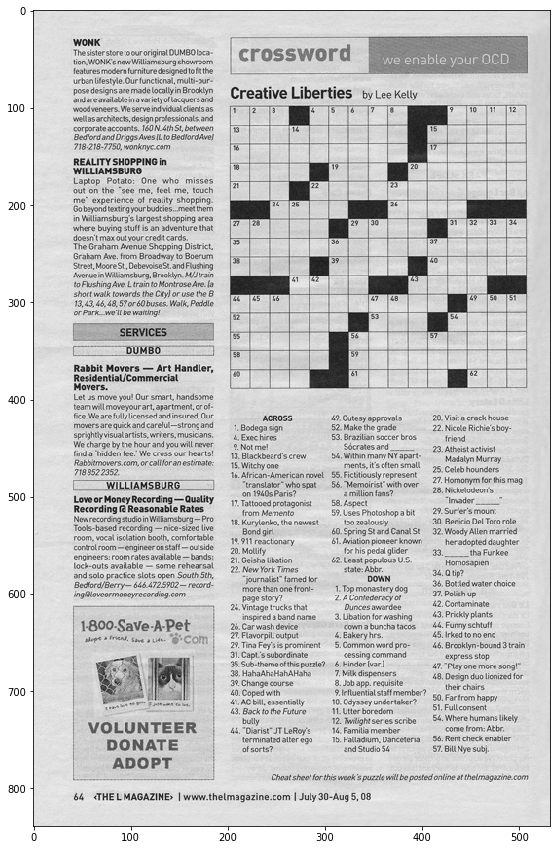

In [38]:
show_pic(img)

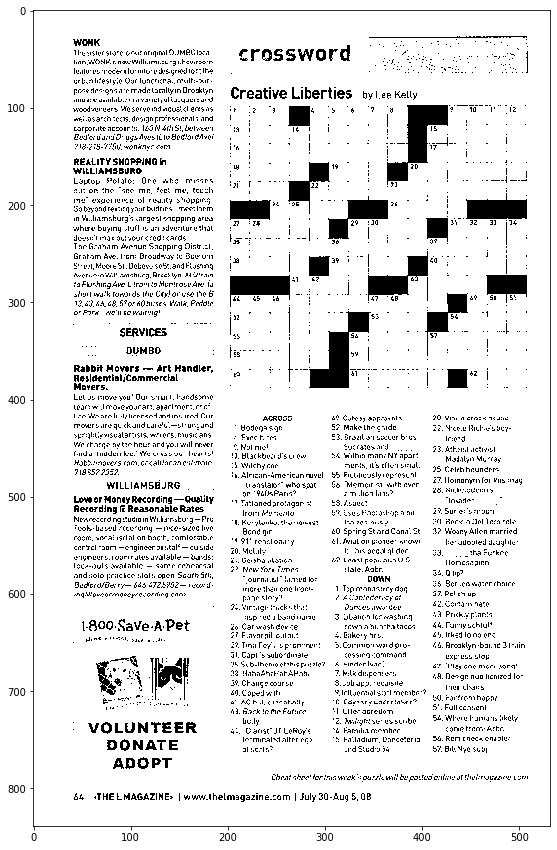

In [39]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_pic(thresh1)

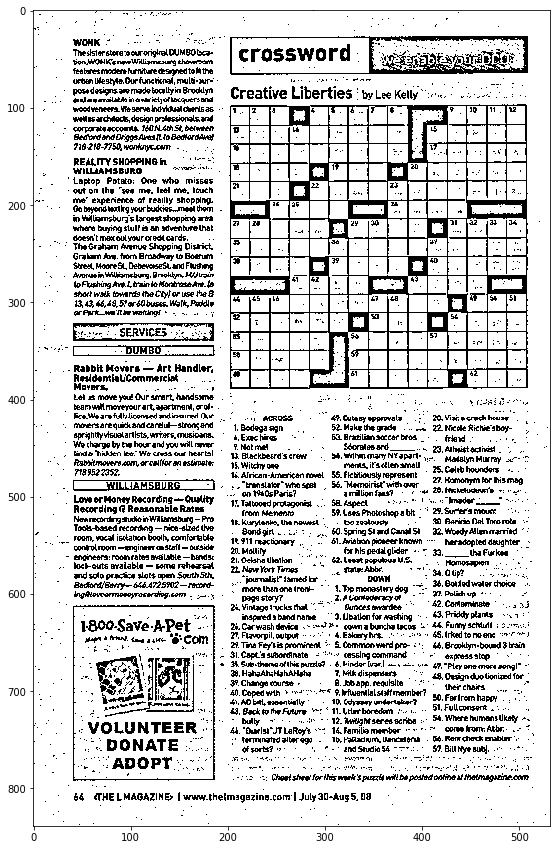

In [40]:
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(th2)

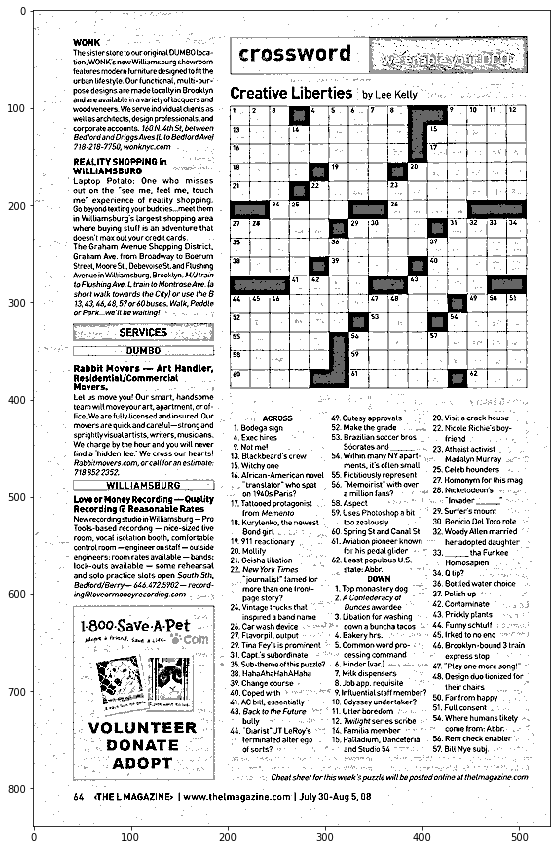

In [43]:
blended = cv2.addWeighted(src1=thresh1, alpha=0.6, src2=th2, beta=0.4, gamma=0)
show_pic(blended)

# Blurring and Smoothing

- A common operation for image processing is blurring or smoothing an image.
- Smoothing an image can help get rid of noise, or help an application focus on general details.
- There are many methods of blurring and smoothing.
- Often blurring or smoothing is combined with edge detection.
- Edge detection algorithms detect too many edges when shown a high resolution images without any blurring.

## Methods we'll be exploring
- Gamma Correlation
    > Gamma correlation can be applied to an image to make it appear brighter or darker depending on the Gamma value chosen 
- Kernel Based Filters
- Kernels can be applied over an image to produce a variety of effects
- The best way to explain this is through an interavtive visualization